In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sn

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "./data/by_state/WV/wv_extent_coverage.shp"
grid = gd.read_file(grid_path)
grid = grid.set_index('id')

In [4]:
feature_path = './data/by_state/WV/urban/tl_2018_54_tabblock10.shp'
feature = gd.read_file(feature_path).to_crs(grid.crs)
feature = feature.set_index('GEOID10')
feature = gd.clip(feature, grid)

In [5]:
grid['centroid'] = grid['geometry'].centroid
grid = grid.set_geometry('centroid')
grid['UR10'] = gd.sjoin(grid, feature, how="left", op="within")['UR10']
grid = grid.set_geometry('geometry')
grid = grid.drop('centroid', axis=1)
grid

,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,UR10
id,,,,,,,,,
231.0,-9.152446e+06,4.595449e+06,-9.151446e+06,4.594449e+06,-120.000,0,0,"POLYGON ((-9152445.857 4595449.221, -9151445.8...",R
241.0,-9.152446e+06,4.585449e+06,-9.151446e+06,4.584449e+06,-120.000,0,0,"POLYGON ((-9152445.857 4585449.221, -9151445.8...",R
579.0,-9.151446e+06,4.596449e+06,-9.150446e+06,4.595449e+06,-120.000,0,1,"POLYGON ((-9151445.857 4596449.221, -9150445.8...",R
590.0,-9.151446e+06,4.585449e+06,-9.150446e+06,4.584449e+06,-120.000,0,0,"POLYGON ((-9151445.857 4585449.221, -9150445.8...",R
591.0,-9.151446e+06,4.584449e+06,-9.150446e+06,4.583449e+06,-120.000,0,0,"POLYGON ((-9151445.857 4584449.221, -9150445.8...",R
...,...,...,...,...,...,...,...,...,...
173860.0,-8.654446e+06,4.768449e+06,-8.653446e+06,4.767449e+06,-107.930,1,1,"POLYGON ((-8654445.857 4768449.221, -8653445.8...",R
173861.0,-8.654446e+06,4.767449e+06,-8.653446e+06,4.766449e+06,-108.075,1,1,"POLYGON ((-8654445.857 4767449.221, -8653445.8...",R
174209.0,-8.653446e+06,4.768449e+06,-8.652446e+06,4.767449e+06,-102.595,1,1,"POLYGON ((-8653445.857 4768449.221, -8652445.8...",R


In [6]:
grid['agreement'] = grid['chg_covera'] == grid['verizon_co']

In [7]:
grid['urban'] = grid['UR10'].map({'U': True, 'R': False})

In [8]:
grid[grid['UR10'] == 'R']

,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,UR10,agreement,urban
id,,,,,,,,,,,
231.0,-9.152446e+06,4.595449e+06,-9.151446e+06,4.594449e+06,-120.000,0,0,"POLYGON ((-9152445.857 4595449.221, -9151445.8...",R,True,False
241.0,-9.152446e+06,4.585449e+06,-9.151446e+06,4.584449e+06,-120.000,0,0,"POLYGON ((-9152445.857 4585449.221, -9151445.8...",R,True,False
579.0,-9.151446e+06,4.596449e+06,-9.150446e+06,4.595449e+06,-120.000,0,1,"POLYGON ((-9151445.857 4596449.221, -9150445.8...",R,False,False
590.0,-9.151446e+06,4.585449e+06,-9.150446e+06,4.584449e+06,-120.000,0,0,"POLYGON ((-9151445.857 4585449.221, -9150445.8...",R,True,False
591.0,-9.151446e+06,4.584449e+06,-9.150446e+06,4.583449e+06,-120.000,0,0,"POLYGON ((-9151445.857 4584449.221, -9150445.8...",R,True,False
...,...,...,...,...,...,...,...,...,...,...,...
173849.0,-8.654446e+06,4.779449e+06,-8.653446e+06,4.778449e+06,-120.000,0,1,"POLYGON ((-8654445.857 4779449.221, -8653445.8...",R,False,False
173850.0,-8.654446e+06,4.778449e+06,-8.653446e+06,4.777449e+06,-115.595,0,1,"POLYGON ((-8654445.857 4778449.221, -8653445.8...",R,False,False
173860.0,-8.654446e+06,4.768449e+06,-8.653446e+06,4.767449e+06,-107.930,1,1,"POLYGON ((-8654445.857 4768449.221, -8653445.8...",R,True,False


In [9]:
sn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [10]:
confusion_matrix = pd.crosstab(grid['agreement'], grid['urban'], rownames=['Agreement'], colnames=['Urban'])
confusion_matrix['Total'] = grid.groupby('urban').count()['agreement']
print (confusion_matrix)

Urban      False  True  Total
Agreement                    
False       2333   122   4828
True        2495   357    479


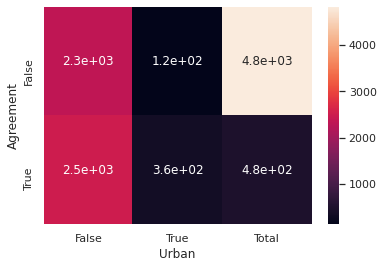

In [11]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [14]:
confusion_matrix = pd.crosstab(grid['urban'], grid['agreement'], colnames=['Agreement'], rownames=['Urban'], normalize='index')
confusion_matrix['Total'] = grid.groupby('urban').count()['agreement']
print (confusion_matrix)

Agreement     False      True  Total
Urban                               
False      0.483223  0.516777   4828
True       0.254697  0.745303    479


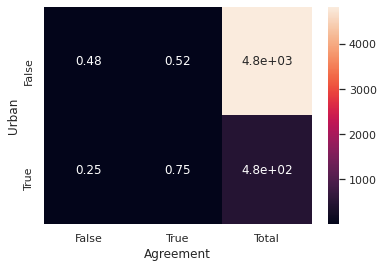

In [15]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()